### This Notebook will be used to evaluate and model various CryptoCurrency's available for investment.  the Analysis and results will be presented to the Advisory Services Team.

In [132]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [133]:
# read in the data set
df = pd.read_csv('crypto_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [134]:
# count all unique values in the IsTrading Column
df['IsTrading'].value_counts()


True     1144
False     108
Name: IsTrading, dtype: int64

In [135]:

#  drop all rows where IsTrading = False
df = df[df['IsTrading'] == True]

# count all unique values in the IsTrading Column
df['IsTrading'].value_counts()



True    1144
Name: IsTrading, dtype: int64

In [136]:
# review for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [137]:
# drop all rows where where atleast one column has null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 38.1+ KB


In [138]:
# sort the df by TotalCoinsMined in ascending order
df = df.sort_values(by='TotalCoinsMined', ascending=True)



In [139]:
# drop all rows where TotalCoinsMined is null 0 or less
df = df[df['TotalCoinsMined'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 29.6+ KB


In [141]:
# determine total count of unique CoinNames and show in a list
df['CoinName'].nunique()


531

In [128]:
# drop the CoinName and Unnamed: Columns
df = df.drop(['CoinName', 'Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1234
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   IsTrading        532 non-null    bool   
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(3)
memory usage: 21.3+ KB


In [105]:
# convert the Algorithim and ProofType to numerical values using get_dummies
dummy_df = pd.get_dummies(df, columns=['Algorithm', 'ProofType', 'IsTrading'])
dummy_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1234
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    object 
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

In [106]:

# comvert dummy df to a dataframe
dummy_df = pd.DataFrame(dummy_df)
dummy_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1234
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    object 
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

In [107]:
# standardize all the data so that columns that contain larger values do not unduly influence the outcome
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dummy_df)
scaled_df = scaler.transform(dummy_df)
scaled_df = pd.DataFrame(scaled_df, columns=dummy_df.columns)
scaled_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,IsTrading_True
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0.0
1,-0.117108,5.521452,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0.0
2,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0.0
3,-0.117107,-0.152863,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0.0
4,-0.117106,-0.144004,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,0.0


### Dimension reduction will be completed using PCA to achieve 90% explained variance and once reduced, then t-SNE will be used to reduce the data to two features to identify and analyze clusters.

In [108]:
#  import the PCA library
from sklearn.decomposition import PCA

#  intialize the PCA object
pca = PCA(n_components=0.9)

#  get the principal components of the scaled data
principal_components = pca.fit_transform(scaled_df)


In [109]:

principal_components = pd.DataFrame(principal_components)
principal_components.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       532 non-null    float64
 1   1       532 non-null    float64
 2   2       532 non-null    float64
 3   3       532 non-null    float64
 4   4       532 non-null    float64
 5   5       532 non-null    float64
 6   6       532 non-null    float64
 7   7       532 non-null    float64
 8   8       532 non-null    float64
 9   9       532 non-null    float64
 10  10      532 non-null    float64
 11  11      532 non-null    float64
 12  12      532 non-null    float64
 13  13      532 non-null    float64
 14  14      532 non-null    float64
 15  15      532 non-null    float64
 16  16      532 non-null    float64
 17  17      532 non-null    float64
 18  18      532 non-null    float64
 19  19      532 non-null    float64
 20  20      532 non-null    float64
 21  21      532 non-null    float64
 22  22

In [110]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [111]:
#  further reduce the principal_components using t-SNE
from sklearn.manifold import TSNE

# create a new dataframe for the t-SNE
tsne_df = pd.DataFrame(principal_components)
# tsne_df.info()


In [112]:
# intialize the t-SNE object
tsne = TSNE(learning_rate=35)

In [113]:
# reduce the dimensions of the data
tsne_features = tsne.fit_transform(tsne_df)

C:\Users\benjy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [114]:
# check the shape of the data
tsne_features.shape

(532, 2)

In [115]:
# prepare to plot the data
tsne_df['X'] = tsne_features[:, 0]
tsne_df['Y'] = tsne_features[:, 1]


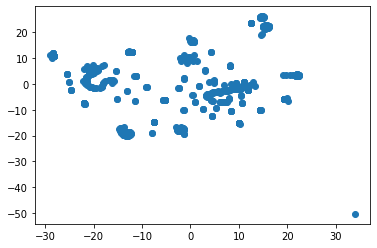

In [116]:
# vizualize the clusters
plt.scatter(tsne_df['X'], tsne_df['Y'])
plt.show()

### Cluster Analysis will be completed using k-Means model

In [117]:
# import the KMeans library
from sklearn.cluster import KMeans


In [118]:
# identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 11))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# create the elbow curve using hvplot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.info()


C:\Users\benjy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\benjy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\benjy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\benjy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   k        10 non-null     int64  
 1   inertia  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


C:\Users\benjy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\benjy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


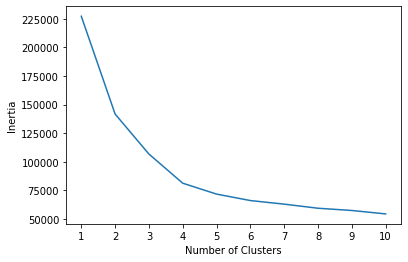

In [119]:
# plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## in review of the original crypto data set that included 531 unique coinstypes, 70 algorithim types and 25 proof types, through a combination of both PCA and t-SNE reduction analysis as well as using k-means for clustering analysis, the model noted that 4-5 clusters could be leveraged for analysis by the advisory board.   